# Penguins
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [3]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
penguins = sns.load_dataset("penguins")
df = penguins.copy()

In [5]:
# veri setine ilk bakış
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Veri Seti Hikayesi
* **species**: penguenin türü
* **island**: penguenin yaşadığı ada
* **bill_length_mm**: penguenin gaga uzunluğu (milimetre cinsinden)
* **bill_depth_mm**: penguenin gaga derinliği (milimetre cinsinden)
* **flipper_length_mm**: penguenin palet uzunluğu (milimetre cinsinden)
* **body_mass_g**: penguenin vücut kütlesi (gram cinsinden)
* **sex**: penguenin cinsiyeti

In [6]:
# veri setinin son 5 gözlemi
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [7]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* 344 gözlem var
* 7 değişkenli (3 tanesi object, 4 tanesi float)
* 18.9+ KB yer kaplıyor

In [8]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
# veri setindeki object veri tiplerinin category veri tiplerine dönüşümü
df.species = pd.Categorical(df.species)
df.island = pd.Categorical(df.island)
df.sex = pd.Categorical(df.sex)

In [10]:
# veri setinin gözlem ve değişken sayısı
df.shape
print(f"Veri setinin gözlem sayısı: {df.shape[0]}")
print(f"Veri setinin değişken sayısı: {df.shape[1]}")

Veri setinin gözlem sayısı: 344
Veri setinin değişken sayısı: 7


In [11]:
# veri setindeki değişken isimleri
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


* gaga uzunlukları ve derinlikleri gayet normal seyirde
* en hafif penguen 27 kg, en ağır penguen 63 kg
* ortalama palet uzunluğu 20 cm

In [13]:
# eksik değer var mı?
df.isnull().values.any()

True

In [14]:
# hangi değişkende kaçar tane eksik veri var
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* 11 tane penguenin cinsiyeti bilinmiyor
* ikişer tane penguenin uzunluk bilgileri bilinmiyor

In [15]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE


In [16]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.species.values.unique()

[Adelie, Chinstrap, Gentoo]
Categories (3, object): [Adelie, Chinstrap, Gentoo]

In [17]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.species.value_counts().count()

3

In [18]:
# kategorik değişkenlerin sınıf frekansına erişmek
kat_df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

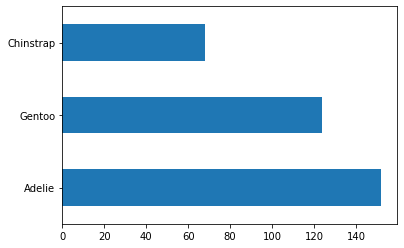

In [19]:
# kategorik değişkenlerin sınıf frekansını grafiğe dökmek
kat_df.species.value_counts().plot.barh();

In [20]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float64","int64"])

In [21]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.bill_length_mm.describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

<a id="2"></a> <br>
## Görselleştirme

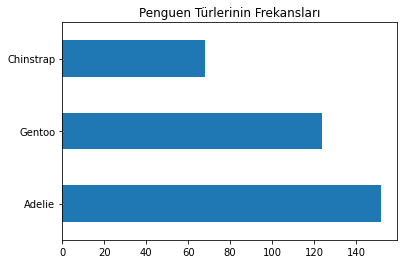

In [24]:
# kategorik değişkenin sınıflarının frekanslarını görselleştirmek
(df.species
 .value_counts()
 .plot.barh()
 .set_title("Penguen Türlerinin Frekansları")
);

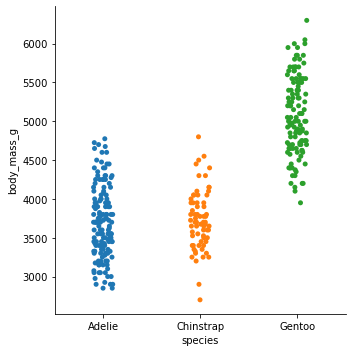

In [41]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "species", y = "body_mass_g", data = df);

* Gentoo türü penguenlerin vücut ağırlığı diğer iki türe göre daha fazla
* Adelie ve Chinstrap türü penguenlerin vücut ağırlığı ortalaması hemen hemen aynı

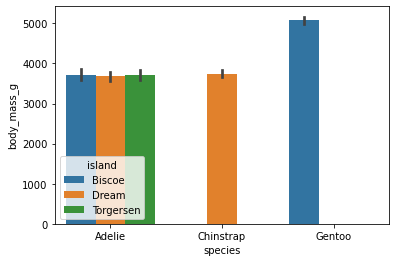

In [44]:
# grafiğe üçüncü bir boyut ekleyerek bilgiyi detaylandırmak
sns.barplot(x = "species", y = "body_mass_g", hue = "island", data = df);

* Gentoo türü penguenler sadece Biscoe adasında yaşıyor
* Chinstrap türü penguenler sadece Dream adasında yaşıyor
* Adelie türe penguenler bütün adalarda yaşıyor

In [45]:
# verinin sunduğu bilgiyi doğrulamak
df.groupby(["species","island"])["body_mass_g"].mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3706.372549
Chinstrap  Biscoe               NaN
           Dream        3733.088235
           Torgersen            NaN
Gentoo     Biscoe       5076.016260
           Dream                NaN
           Torgersen            NaN
Name: body_mass_g, dtype: float64

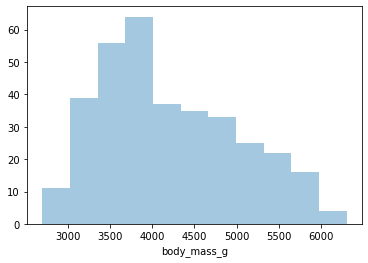

In [46]:
# nümerik değişkenin histogramı
sns.distplot(df.body_mass_g, kde = False);

* Penguenlerin vücut ağırlığı ortalama 3.5 ile 4 kg arasında

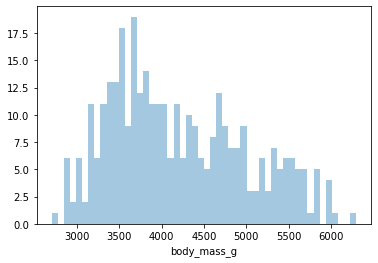

In [50]:
# nümerik değişkenin hassas histogramı
sns.distplot(df.body_mass_g, bins = 50, kde = False);

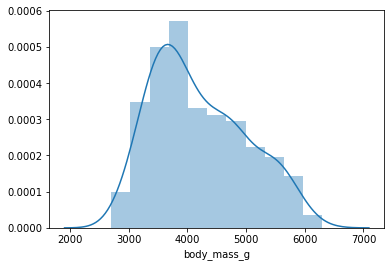

In [52]:
# histogram ve yoğunluk grafiği
sns.distplot(df.body_mass_g);

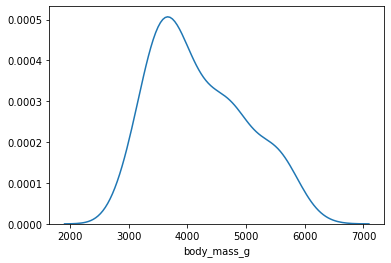

In [53]:
# yoğunluk grafiği
sns.distplot(df.body_mass_g, hist = False);

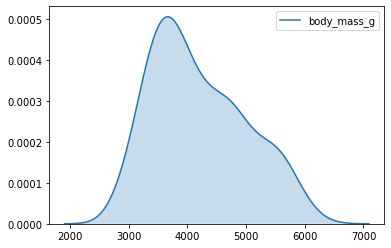

In [54]:
# karalı yoğunluk grafiği
sns.kdeplot(df.body_mass_g, shade = True);

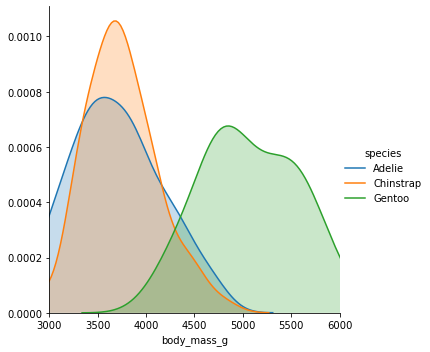

In [56]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "species", 
            height = 5, 
            xlim = (3000,6000))
 .map(sns.kdeplot, "body_mass_g", shade = True)
 .add_legend()
);

* Gentooların ağırlığı daha fazla

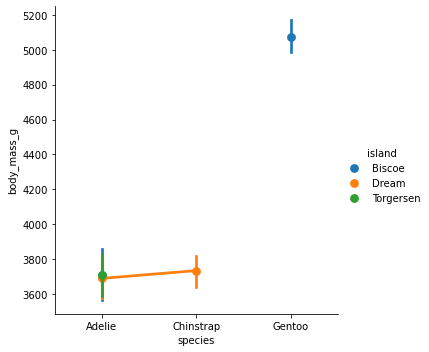

In [57]:
# noktalı üç boyutlu grafik
sns.catplot(x = "species", y = "body_mass_g", hue = "island", kind = "point", data = df);

* Biscoe adasındaki penguenlerin kütlesi daha fazla çünkü orada Gentoolar yaşıyor.

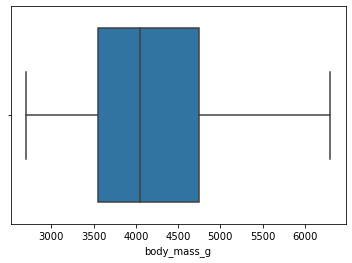

In [59]:
# kutu grafiği - yatay
sns.boxplot(df.body_mass_g);

* aykırı bir değer yok

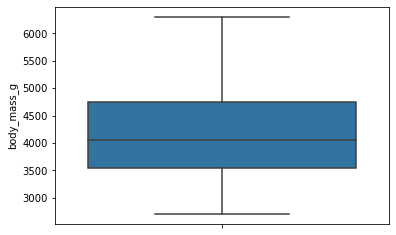

In [60]:
# kutu grafiği - dikey
sns.boxplot(df.body_mass_g, orient = "v");